# Introduction to Logistic Regression

As you all know I've been doing a article series on machine learning concepts and this is the first article on logistic regression. You can also find the articles on my previous posts, so for more updates follow me on:

- [LinkedIn](https://www.linkedin.com/in/pro-programmer/)
- [YouTube](http://www.youtube.com/@itvaya)
- [gtihub](https://github.com/RishatTalukder/Machine-Learning-Zero-to-Hero)
- [Gmail](talukderrishat2@gmail.com)
- [discord](https://discord.gg/ZB495XggcF)

# Logictic Regression Basics

## What is Logistic Regression?

`Logistic Regression` is a `classification algorithm` which is used to `predict` the `probability` of a `binary class` or `multiple classes` of a given `input`. 

It is a supervised learning algorithm which means that it is trained on a `labeled dataset` and it can be used to predict the `output` of a given `input`.

> I like to call it the `linear regression` of categorical data.

## How does it work?

Let's say we have a `dataset` like this:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(0)
df = pd.DataFrame(
    data = {
        'Feature' : np.arange(1,101),
        'Target' : np.array([0]*60 + [1]*40)
    }
)

df.head()

,Feature,Target
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


Here, I made a very simple data set with `feature` and `target` and If I traina linear regression model on this data, it will give me a regression line like below.

> in the dataset I have the first 60 samples of target set as 0 and rest is set to 1 for better unserstanding.

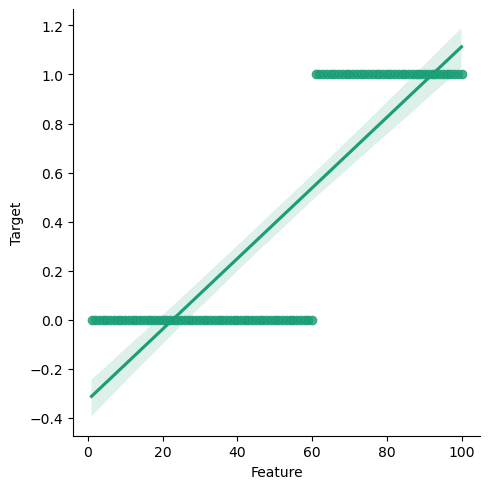

In [2]:
import seaborn as sns
sns.set_palette('Dark2')
sns.lmplot(x='Feature', y='Target', data=df)

Now, this is not a bas model. We can clearly see that it is trying to predict the the values from `0` to `1` and the prediction sometimes can be fractional.

But the huge problem is that the categorical variables cannot be converted into numbers. And there is another issue that if you look closely at the regression line, right aroung the value of `20` of the feature `axis` the value is less than `0` which is not possible, what does negetive category even mean?

So, we need a clear way to predict categorical values and no more fractions or negative values.

### Sigmoid

I don't know if you ever heard of the `sigmoid function`. It is a non-linear function that takes a input and transforms it into `0` to `1` range. 

The `sigmoid function` is defined as:

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

Here, $x$ is the input and $\sigma(x)$ is the output.

Now, what does this function has to do with the `logistic regression`? Well, the `sigmoid function` is used to transform the input into the output. So, if you have a `feature` that is `categorical` and you want to predict it in the `0` to `1` range, you can use the `sigmoid function` to transform the input of a `linear regression` into the output from `0` to `1` range.

This is how a sigmoid function looks like:
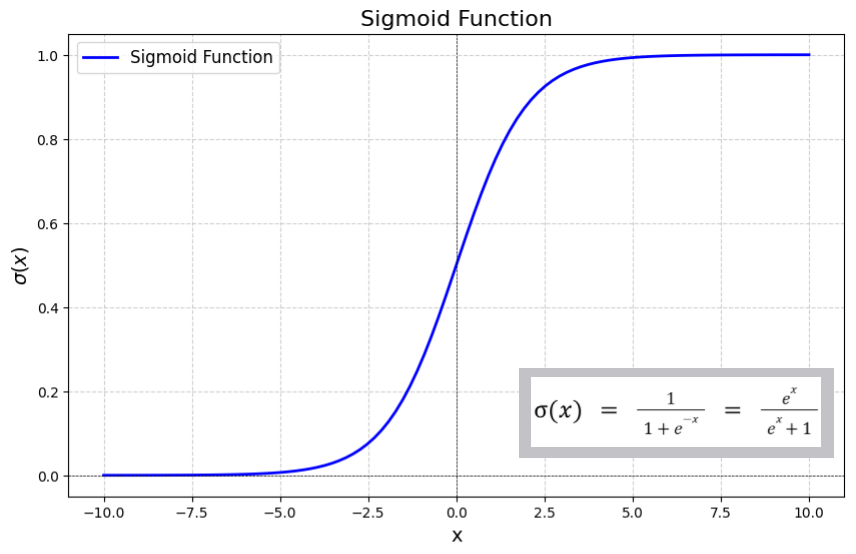

This is used because this represents the probalility of the `feature` being `1` or `0` and sometimes the probability can be a fractional value but it is for a very small range of the feature values.

So, what we can do is set a cutoff value for the `sigmoid function` like `0.5`. If the probability is greater than `0.5` then the value is `1` and if the probability is less than `0.5` then the value is `0`.

So, how do we use this function in the `logistic regression`? 

### Sigmoid to Logistic Regression

So, previously we learned that the sigmoid function can transform the input of any value into the output from `0` to `1` range and it represents the probability of the `feature` being `1` or `0`. So, we can use this function to transform the input of the `linear regression` into the output from `0` to `1` range too.

So, the regression line is now:

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

As, $x$ is the input and $\sigma(x)$ is the output, we can replce $x$ with the equation of the `linear regression` and get the equation of the `logistic regression`.

$$
\sigma(\hat{y}) = \frac{1}{1 + e^{-(\hat{y})}}
$$

Where $\hat{y}$ is the output of the `linear regression`. So, the final equation of the `logistic regression` is:

$$
\sigma(\hat{y}) = \frac{1}{1 + e^{-(\beta_0 + \beta_1x)}}
$$

or more simply:

$$
\sigma(\hat{y}) = \frac{1}{1 + e^{-(mx + c)}}
$$

Here, $\beta_0$ or `c` is the intercept and $\beta_1$ or `m` is the slope of the regression line.

And we have a clear equation of the `logistic regression` now.

> The sigmoid function is also know as the `logistic function` and that's where the name `logistic regression` comes from.

So, if we combine the two equations in a graph we should get something like this:

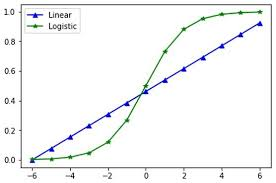


In [3]:
df_jitter = df.copy()
df_jitter["Target"] = df_jitter["Target"] + np.random.normal(0, 0.03, size=len(df))
df_jitter["Target"] = df_jitter["Target"].clip(0, 1)

> Ps: for demostrating the code logistic regression line with linear regression line, I have to add some noise to the data. 

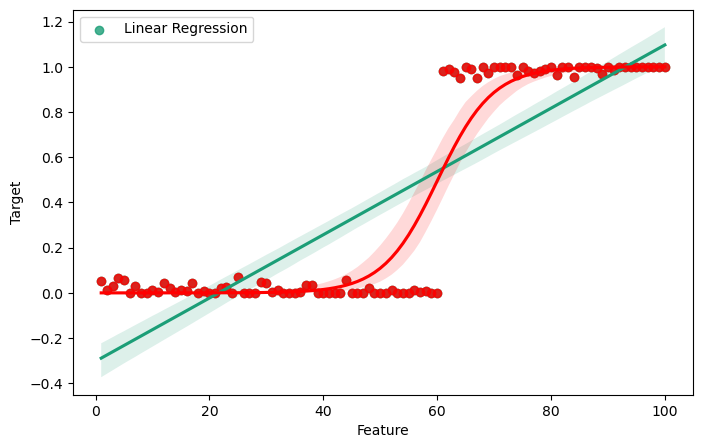

In [4]:
plt.figure(figsize=(8, 5))

# Linear regression
sns.regplot(
    x="Feature",
    y="Target",
    data=df_jitter,
    label="Linear Regression"
)

# Logistic regression (sigmoid)
sns.regplot(
    x="Feature",
    y="Target",
    data=df_jitter,
    logistic=True,
    color="red",
)

plt.legend()
plt.show()


> To use the logistic argument in the code, you need to install the `statsmodels` library. you can install it using conda by running `conda install statsmodels` 

And that's it. So, we can clearly see that logistic regression is transforming the `regression` line into a `logistic function`. 

And we can now use this concept to do `binary classification` and `multiclass classification`.

> Multiclass classification is more complecated than binary classification with logistic regression because the sigmoid function is defined for only one value. 

I hope you unserstand the concept of `logistic regression` and now we can pracitcally train a model with `logistic regression`.

# So Let's Get Some Data

Let's use maybe `the most popular dataset` in the world. It's called `Titanic Dataset`. You can find this data set from [Kaggle](https://www.kaggle.com/competitions/titanic/data)

You will find two datasets there. One is the `train` dataset and the other is the `test` dataset.

> This is from a competition. So, the data is not clean. But, it's good enough for us to practice.

So, let's load and see the data.

In [5]:
data = pd.read_csv('./titanic_train.csv')

In [6]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Now, what does the features of this data represent?

- `PassengerId`: The unique identifier for each passenger.
- `Survived`: Whether the passenger survived the sinking of the Titanic.
- `Pclass`: The passenger's class, which can be one of the following:
  - 1st
  - 2nd
  - 3rd
- `Name`: The passenger's name.
- `Sex`: The passenger's sex, which can be one of the following:
  - Male
  - Female
- `Age`: The passenger's age in years.
- `SibSp`: The number of siblings/spouses aboard the Titanic.
- `Parch`: The number of parents/children aboard the Titanic.
- `Ticket`: The unique identifier for each passenger's ticket.
- `Fare`: The passenger's fare, which can be one of the following:
  - 0.25
  - 1.00
  - 2.00
- `Cabin`: The passenger's cabin number.
- `Embarked`: The passenger's embarkation port, which can be one of the following:
  - Cherbourg(C)
  - Queenstown(Q)
  - Southampton(S)


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We can see that this dataset has `12` features and `891` samples and we can clearly see from the info that there are features that has some `missing values`.

We still don't know the `target` variable but that's okay, let's do some exploration.

# Analysis & Cleaning

First let's deal with the `missing values`.

Sometimes we have to deal with multiple features with missing values. In this case that is true. We have 3 features that have missing values. 

So, what do we do.

First we need to think if we can save the features that have missing values. 

So, for a huge dataset it might be helpful to visualize the columns to find out which features have missing values.

Now, what do I mean by `visualize the columns`?

There is a method in pandas dataframes that gives you a `boolean dataframe` that indicates which samples of a features has missing values.

That is `isnull()`.


In [8]:
data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


As you can see, this method returns the whole dataframe with only `true` or `false` values.

> True if the value is null and False if the value is not null.

We can use this method check which features is irredeemable.

but how?

By using `heatmap`.

Sounds weird right?

Let's just make a heatmap with the `isnull()` method.

<Axes: >

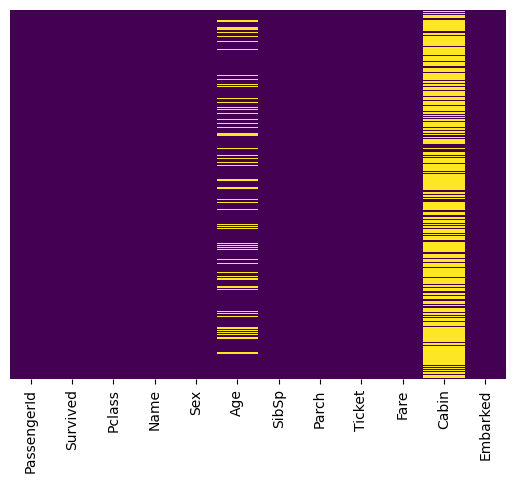

In [9]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap="viridis")

Now, you can see that the heatmap is showing us the features and the different colors are representing the `true` and `false` values. 

> yticklabels=False means that we don't want to show the y axis labels.
> cbar=False means that we don't want to show the color bar.
> cmap="viridis" means that we want to use the viridis color map.

The yellow color represents the missing datapoints. And we can clearly see that, `cabin` feature has too many missing values and clearly it is unusable and we should remove it from our model.

So, let's just drop the feature.

In [10]:
data.drop(columns=['Cabin'], inplace=True)

Now, let's do some more data visualization. 

We have another column that has a number of missing values. We cannot remove the `age` column because it is a numeric column and it has a implact on the survival rate.

Let's doa thought experiment. Let's say your boat is sinking. There are many people on board. Some of them are 2 to 3 years old. Some are 70 to 80 years old and some are 20-50 years old.

We can clearly see a picture that the survival rate is higher for people who are younger and strong.

So, we cannot remove the `age` column. So, we have to fill the missing values.

How do we fill the missing values? We can use the `fillna()` function.

But the problem is if we use the `fillna()` function, we have to use a specific value that can be derived from a aggregate function. For example, if we want to fill the missing values with the mean, we can use `fillna(mean)` But if we use the `mean` function, it will give us the mean of all the values in the column and that can create a bias.

Let's say we get the mean of `30` years. There are close to 200 missing values. So, if we fill the missing values with the mean, the model is almost assured to be biased towards the mean value.

So, we need to figure out a different way.

One way is to use other columns to figure out the impact they have on the `age` column. For example, we can use the `sex` column to figure out the distribution of the ages. Depepending on the sex, the age distribution can be different.

Likewise for the `Pclass(passenger class)` and `embarked` columns.

So, let's find out which has the highest impact on the `age` column.

<Axes: xlabel='Sex', ylabel='Age'>

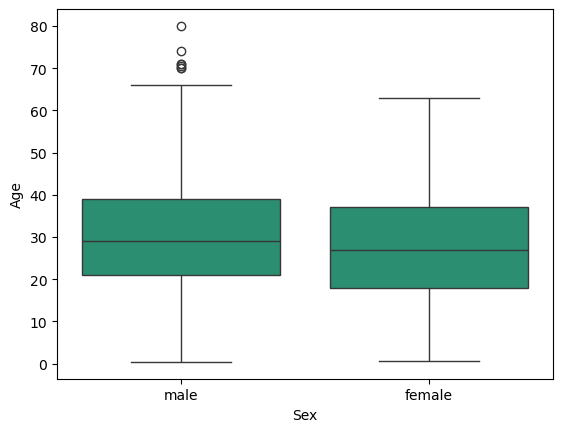

In [11]:
sns.boxplot(data=data, x='Sex', y='Age')

Here we can see that the male and female are somewhat separated but not by a lot. So, again it can cause some problems in the model. 

WE should explore the `Pclass` column and the `embarked` column to see if there is distinction in the data.

<Axes: xlabel='Pclass', ylabel='Age'>

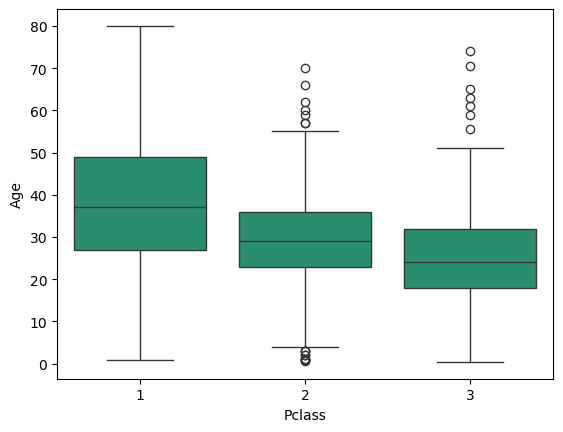

In [12]:
sns.boxplot(data=data, x='Pclass', y='Age')

Ow, we migth not even have to observe the `embarked` column at all because this looks promising. The `Pclass 1` and `Pclass 2` and `Pclass 3` have different distributions of age. 

The median of the `passenger classes` are well separated and looks realistic.

> Pclass 1 = 1st class: only affordable for the rich who are already wealthy and should be a little older than the average.

So, w euse the `Pclass` column to to fill the values of the `age` column.

So, let's extract the `median age` of the passengers of each class.

In [13]:
pclass_1_mean = data[data['Pclass']== 1]['Age'].median()
pclass_2_mean = data[data['Pclass']== 2]['Age'].median()
pclass_3_mean = data[data['Pclass']== 3]['Age'].median()

In [14]:
pclass_1_mean, pclass_2_mean, pclass_3_mean

(37.0, 29.0, 24.0)

Now, we can think of the logic. What we want to do is check if a sample of the age column is `null` or not. If it is `null`, then we will check for it's corresponding value in the `pclass` column. If it's class is `1` we return the median age of the passengers of that class. If it's class is `2` we return the median age of the passengers of that class and so on.

So, let's make a custom function.

In [15]:
def fill_age(columns):
    Age = columns['Age']
    Pclass = columns['Pclass']
    if pd.isnull(Age):
        if Pclass == 1:
            return pclass_1_mean
        elif Pclass == 2:
            return pclass_2_mean
        else:
            return pclass_3_mean
    else:
        return Age


In [16]:
data['Age'] = data[['Age','Pclass']].apply(fill_age,axis=1)

And now we can see that the age column is filled with median values of different passenger classes.

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


Looks, good.

And we finally have another column that has only 2 missing values.

We can just drop the `samples` because only two samples should not effect a dataset with `891` samples.

In [18]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


ANNNNND we have a datase twith zero missing values.

Now, let's see the distribution of some features.

Let's explore the `target` column first.


<Axes: xlabel='Survived', ylabel='count'>

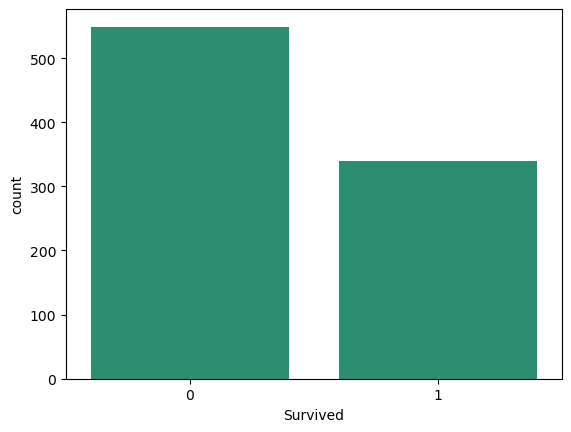

In [19]:
sns.countplot(data=data, x='Survived')

Well, that's depressing. A lot of people didn't survive.

I'm curious to see if the `Pclass` column has any effect on the `Survived` column.

<Axes: xlabel='Survived', ylabel='count'>

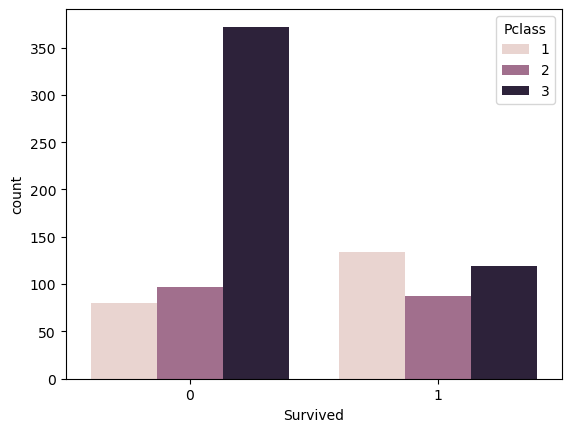

In [20]:
sns.countplot(data=data, x='Survived', hue='Pclass')

Oh no, A lot of people who didn't survive were in the 3rd class. 

Well, that remimnds of the `titanic` movie.

What about the `sex` column?

<Axes: xlabel='Survived', ylabel='count'>

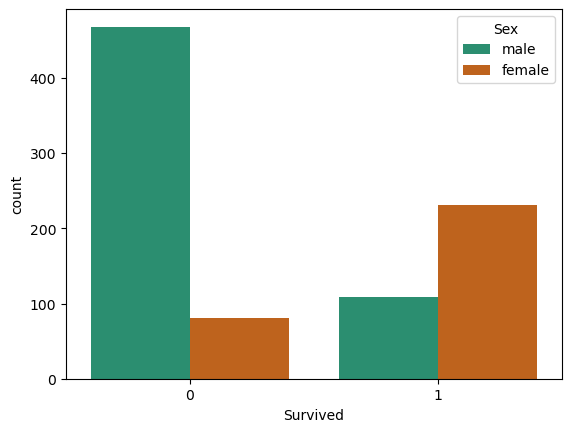

In [21]:
sns.countplot(data=data, x='Survived', hue='Sex')

Most of the people who didn't survive were male. my respects to them. 

No time to mourne, have to do some machine learnign so that one that it can take over the world and kill all the humans.

So, let's clean our data completely now.

We have some features that we don't need. Let's remove them first.

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


- `PassengerId` is the unique identifier for each passenger and it really doesn't have any effect on the `Survived` column.
- `Name` is the name of the passenger and a person should not drown in a big boat just because of his/her name.
- `Ticket` is the unique identifier for each passenger's ticket and it also has no effect on the target.

So, we just drop these columns.

In [23]:
data.drop(
    columns=['PassengerId', 'Name', 'Ticket'],
    inplace=True
)

With those out of the way, Now we have to think about what we are going to do to the categorical columns.

Now, you might ask why do we need to do anything with the categorical columns?

Categorical columns are those that have values that are categorical and not numerical.

A computer only understands numerical values. In `embarked` and `sex` features we see `string` values that are representing categories.

So, we can convert them into numerical values that can be understood by the computer.

## One-Hot Encoding

Let's say you have a categorical column that has `Dhaka`, `Chittagong` and `Sylhet` values. You can represent them with `1`, `2` and `3` values.

Your algorithm should understand easily right?

They should but they won't. 

Because by giving `1`, `2` and `3` values to the categories you are basically giving them a meaning, an order to them.

> 1< 2< 3

And your algorithm might just learn the order first.

It will always think that `Sylhet` is the most important category.

So by just adding `1`, `2` and `3` values to the categories, you are basically saying this category is is more important than that category.

Which not a good approach and can easily lead to overfitting.

That's where `one-hot encoding` comes in.

When you are dealing with categorical columns that has no natural order to them, you can use `one-hot encoding` to represent them.

Let's say you have the following column:

| **City** |
| --- |
| Dhaka |
| Chittagong |
| Sylhet |

If you want to represent them uniquely without the possibility of overfitting, you have to some how represent them equally.

How will you do that?

Think about it, if a sample has `Dhaka` value, is there any way that there can be another city name in that sample?

No. The sample having `dhaka` is saying that there is no possibility of another city name in that sample.

So, How about we separate dhaka as a different column that has only boolean values, `1` if the sample has `dhaka` and `0` if the sample doesn't have `dhaka`?

| **City** | **Dhaka** |
| --- | --- |
| Dhaka | 1 |
| Chittagong | 0 |
| Sylhet | 0 |

The dhaka column is the placeholder/dummy column that only represents if the sample has `dhaka` or not.

If a sample doesn't have dhaka that mean thre might be some other city name in that sample.

There are two possibilities,
- The sample has `chittagong` or `sylhet`

So, we do the same thing for `chittagong`. We make dummy column that only represents if the sample has `chittagong` or not.

| **City** | **Dhaka** | **Chittagong** |
| --- | --- | --- |
| Dhaka | 1 | 0 |
| Chittagong | 0 | 1 |
| Sylhet | 0 | 0 |

Now look at this, the `chittagong` column and the dhaka column is representing the same thing.

But it is also representing the possibility of there being another city name in that sample.

So, if a sample has `chittagong` that has `1` , if it has `0` there can be `dhaka` or `sylhet`. As we have a column representing the `dhaka` column, we can check if the sample has `dhaka` or not.

AND IF THERE IS NO `dhaka` or `chittagong` in the sample, we can be **SURE** there is `sylhet` in the sample.

Now, we drop the original column.

|**Dhaka** | **Chittagong** |
| --- | --- |
| 1 | 0 |
| 0 | 1 |
| 0 | 0 |

> We don't even need a separate colemn for `sylhet` because if there is no `dhaka` or `chittagong` in the sample, we can be **SURE** that the sample has `sylhet`.

These columns are called **dummy columns**. They they act as perfect predictors of each other. As these columns are separated from each other and only has boolean values in them there are no chance of `ordered` values.

We can do `one-hot encoding` easily with pandas.

In [24]:
pd.get_dummies(data=data['Embarked'])

,C,Q,S
0,False,False,True
1,True,False,False
2,False,False,True
3,False,False,True
4,False,False,True
...,...,...,...
886,False,False,True
887,False,False,True
888,False,False,True
889,True,False,False


> The `pd.get_dummies()` function is used to convert categorical columns into dummy columns and it will return dataframe with `all the classes` as `dummy columns`.

Now, to fully get one-hot encoding we can use the drop first argument.

In [25]:
pd.get_dummies(data=data['Embarked'], drop_first=True)

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True
...,...,...
886,False,True
887,False,True
888,False,True
889,False,False


> drop_first argument will drop the first column. As the other columns are perfect predictors of each other.

So, let's turn the categorical columns into dummy columns.

In [26]:
data = pd.get_dummies(
    data=data, 
    columns=['Embarked', 'Sex'], 
    drop_first=True
)

data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Sex_male
0,0,3,22.0,1,0,7.2500,False,True,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,True,False
3,1,1,35.0,1,0,53.1000,False,True,False
4,0,3,35.0,0,0,8.0500,False,True,True


> If you use the column argument it will return the whole dataframe with the `embarked` and `sex` columns one-hot encoded and that can be your new dataset.

We have successfully turned the `embarked` and `sex` columns into dummy columns.

One final thing, do you think those are the only columns that need to be turned into dummy columns?

> Are there any other columns that are also categorical?

I'll leave that for you to think about.

and also find a asnwer to this question. Why did I turn the `embarked` and `sex` columns into dummy columns but kept that column as it is?

There is a reason. Figure it out yourself, then continue to the next section.

So, we now have a dataset like this.

In [27]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Sex_male
0,0,3,22.0,1,0,7.2500,False,True,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,True,False
3,1,1,35.0,1,0,53.1000,False,True,False
4,0,3,35.0,0,0,8.0500,False,True,True
